在现实世界中，作为预封装数据库一部分的数据很少以简洁的<n_samples x n_features>特征矩阵的形式出现
。我们的任务是找到一种有意义的方式表示数据。

寻找表示数据最优方法的过程称为特征工程（featureengineering），这是数据科学家和机器学习实践者试图解决实际问题的主要任务之一

用正确的方式表示我们的数据比我们选择精确的参数对监督模型性能的影响更大

将要介绍预处理、缩放技术以及降维。我们还将学习表示类别变量、文本特征以及图像。
一学就会的常见预处理技术。
中心缩放及多维缩放。
类别变量的表示。
使用PCA之类的技术对数据降维。
文本特征的表示。
学习图像编码的最佳方法。

一个机器学习系统的学习效果都主要取决于训练数据的质量
    标签
    训练数据->特征提取          -> 机器学习算法   -> result

特征工程分为两部分：
    特征选择(feature selection)和特征提取(feature extraction)

    特征选择：
        这是识别数据中重要属性（或者特征）的过程。一张图像的特征可能是边缘、角点或脊的位置
        我们将研究OpenCV提供的一些更高级的特征描述符，例如
        二值鲁棒独立基本特征（Binary Robust Independent Elementary Feature，BRIEF）
        以及面向FAST和可旋转的BRIEF（Oriented FAST and Rotated BRIEF，ORB).
    特征提取：
        这实际上是将原始数据变换到期望特征空间以满足机器学习算法的过程

数据预处理：
    数据预处理包含了数据格式化,数据清洗,数据采集

    数据格式化：
        数据的格式可能不适合我们使用，例如，可能以专有文件格式提供数据，
        我们需要将格式转换为机器学习可以理解的格式
    数据清洗：
        数据可能包含无效记录或者缺失记录，它们需要清除或者删除.
    数据采集：
        对于我们特定目的来说，数据可能太大了，这就迫使我们对数据进行智能采集.

变化预处理数据以适应机器学习算法：
    包含了缩放,分解,聚合

    缩放(scaling)
        ：机器学习算法可能要求数据在一个通用的范围内，如零均值和单位方差
         缩放就是将所有特征放入同一个通用的取值范围
    分解：(decomposition)
        特征分解就是将数据压缩成数量更少,信息更加丰富的数据分量的过程
    聚合：(aggregation)
        有时，可以将多个特征组合成一个更有意义的特征。
        例如，一个数据库可能包含登录到基于Web系统的每个用户的日期和时间。根据不同的任务，通过简单地计算每个用户的登录次数，可以更好地表示这些数据.


特征标准化(standardizing)
    ：是指将数据按比例缩放到零均值和单位方差的过程.
    我们可以手动标准化我们的数据，每个数据点减去所有数据的均值（μ）再除以数据的方差（σ）；即对于每个特征x，我们可以计算（x–μ）/σ.标准化

矩阵标准化
    目的：通过标准化处理，得到均值为0，标准差为1的服从标准正态分布的数据
    原因：
        1)方便处理数据,通过标准化处理，可以使得不同的特征具有相同的Scale。这样，在使用梯度下降法学习参数的时候，不同特征对参数的影响程度就一样了
        2)加快收敛速度。大部分数据矩阵归一化后收敛速度会加快.
        3)提升精度,防止梯度爆炸.

In [78]:

import sklearn


'''（x–μ）/σ.  miu,sigma'''
# scal 规模，尺寸，比例
from sklearn import preprocessing
import numpy as np
X = np.array([[1,2,3],[2,0,0],[0,1,2]])
x = preprocessing.scale(X)

print(x)
print(f'列均值{np.mean(x,axis=0)},行均值{np.mean(x,axis=1)}'
f'列标准差{np.std(x,axis=0)},行标准差{np.std(x,axis=1)}')
# 列均值为0，a[0][0],a[0][1],a[0][2]，列标准差为1

[[ 0.          1.22474487  1.06904497]
 [ 1.22474487 -1.22474487 -1.33630621]
 [-1.22474487  0.          0.26726124]]
列均值[ 0.00000000e+00  0.00000000e+00 -5.55111512e-17],行均值[ 0.76459661 -0.4454354  -0.31916121]列标准差[1. 1. 1.],行标准差[0.54437524 1.18187368 0.64957343]


特征的归一化处理
    与标准化类似，归一化（normalization）是将单个样本缩放到一个单位范数的过程
     L1范数（或者曼哈顿距离）和L2范数（或者欧氏距离)
     在scikit-learn中，我们的数据矩阵X可以使用normalize函数进行归一化，L1范数由norm关键字指定：


In [79]:
'''L1范数'''
X_norm_L1 = preprocessing.normalize(X,norm = 'l1')
X_norm_L1,np.sum(X_norm_L1,axis=1)

(array([[0.16666667, 0.33333333, 0.5       ],
        [1.        , 0.        , 0.        ],
        [0.        , 0.33333333, 0.66666667]]),
 array([1., 1., 1.]))

In [80]:
'''L2范数'''
X_norm_L2 = preprocessing.normalize(X,norm='l2')
X_norm_L2,np.sum(X_norm_L2, axis=0)

(array([[0.26726124, 0.53452248, 0.80178373],
        [1.        , 0.        , 0.        ],
        [0.        , 0.4472136 , 0.89442719]]),
 array([1.26726124, 0.98173608, 1.69621092]))

将特征缩放到指定的数据范围
在scikit-learn中，这可以使用MinMaxScaler对象来实现

In [81]:
'''缩放到【-5，5】'''
min_max_scale = preprocessing.minmax_scale( X,(-5,5))
min_max_scale

array([[ 0.        ,  5.        ,  5.        ],
       [ 5.        , -5.        , -5.        ],
       [-5.        ,  0.        ,  1.66666667]])

In [82]:
'''数据二值化'''
# 调用方法
bin_x = preprocessing.binarize(X,threshold = 0.5)

# 自己写工具
binx = (X> 0.5)+0 # X >0.5 转为 True， false
# +0    True,false 转为 0，1
binx,bin_x

(array([[1, 1, 1],
        [1, 0, 0],
        [0, 1, 1]]),
 array([[1, 1, 1],
        [1, 0, 0],
        [0, 1, 1]]))

缺失数据的处理  NAN  = not a number
    大多数机器学习算法不能处理Not a Number（NAN）值（Python中的nan)
    用一些恰当的填充值替换所有nan值。这就是缺失值的估算

    1) 用均值代替 mean
    2)用中值代替 median
    3)用最频繁的值代替 most_frequent

In [83]:
nan = np.nan
X_nan = np.array([[1,2,3,nan],[1,nan,3,4],[1,nan,3,4],[nan,2,3,4,]])
#   调用方法
imp = sklearn.impute.SimpleImputer(strategy='median')
#allowed_strategies = ["mean", "median", "most_frequent", "constant"]
x = imp.fit_transform(X_nan)
x

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

理解维度

维数灾难（the curse of dimensionality)：
    填充可用空间所需的数据点数随着维数（或绘图轴）呈指数级增长。如果送入一个分类器的数据点没有跨越整个特征空间（如图4-3中的立方体所示），那么当出现一个新数据点，且这个新数据点与之前遇到的所有数据点距离都很远时，分类器就不知道该做什么了.

    出现一定数量的特征（或者维度）后，分类器的性能将开始下降.


用OpenCV实现主成分分析
    最常见的一种降维技术是主成分分析（Principal Component Analysis，PCA).

考虑一个数据集，我们刚好从中提取两个特征。这些特征可以是在x和y两个位置上的像素灰度值，但是也可能比这个更复杂。如果我们沿着这两个特征轴绘制数据集，数据可能位于某个多元高斯分布内

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
np.random.seed(42)
%matplotlib inline

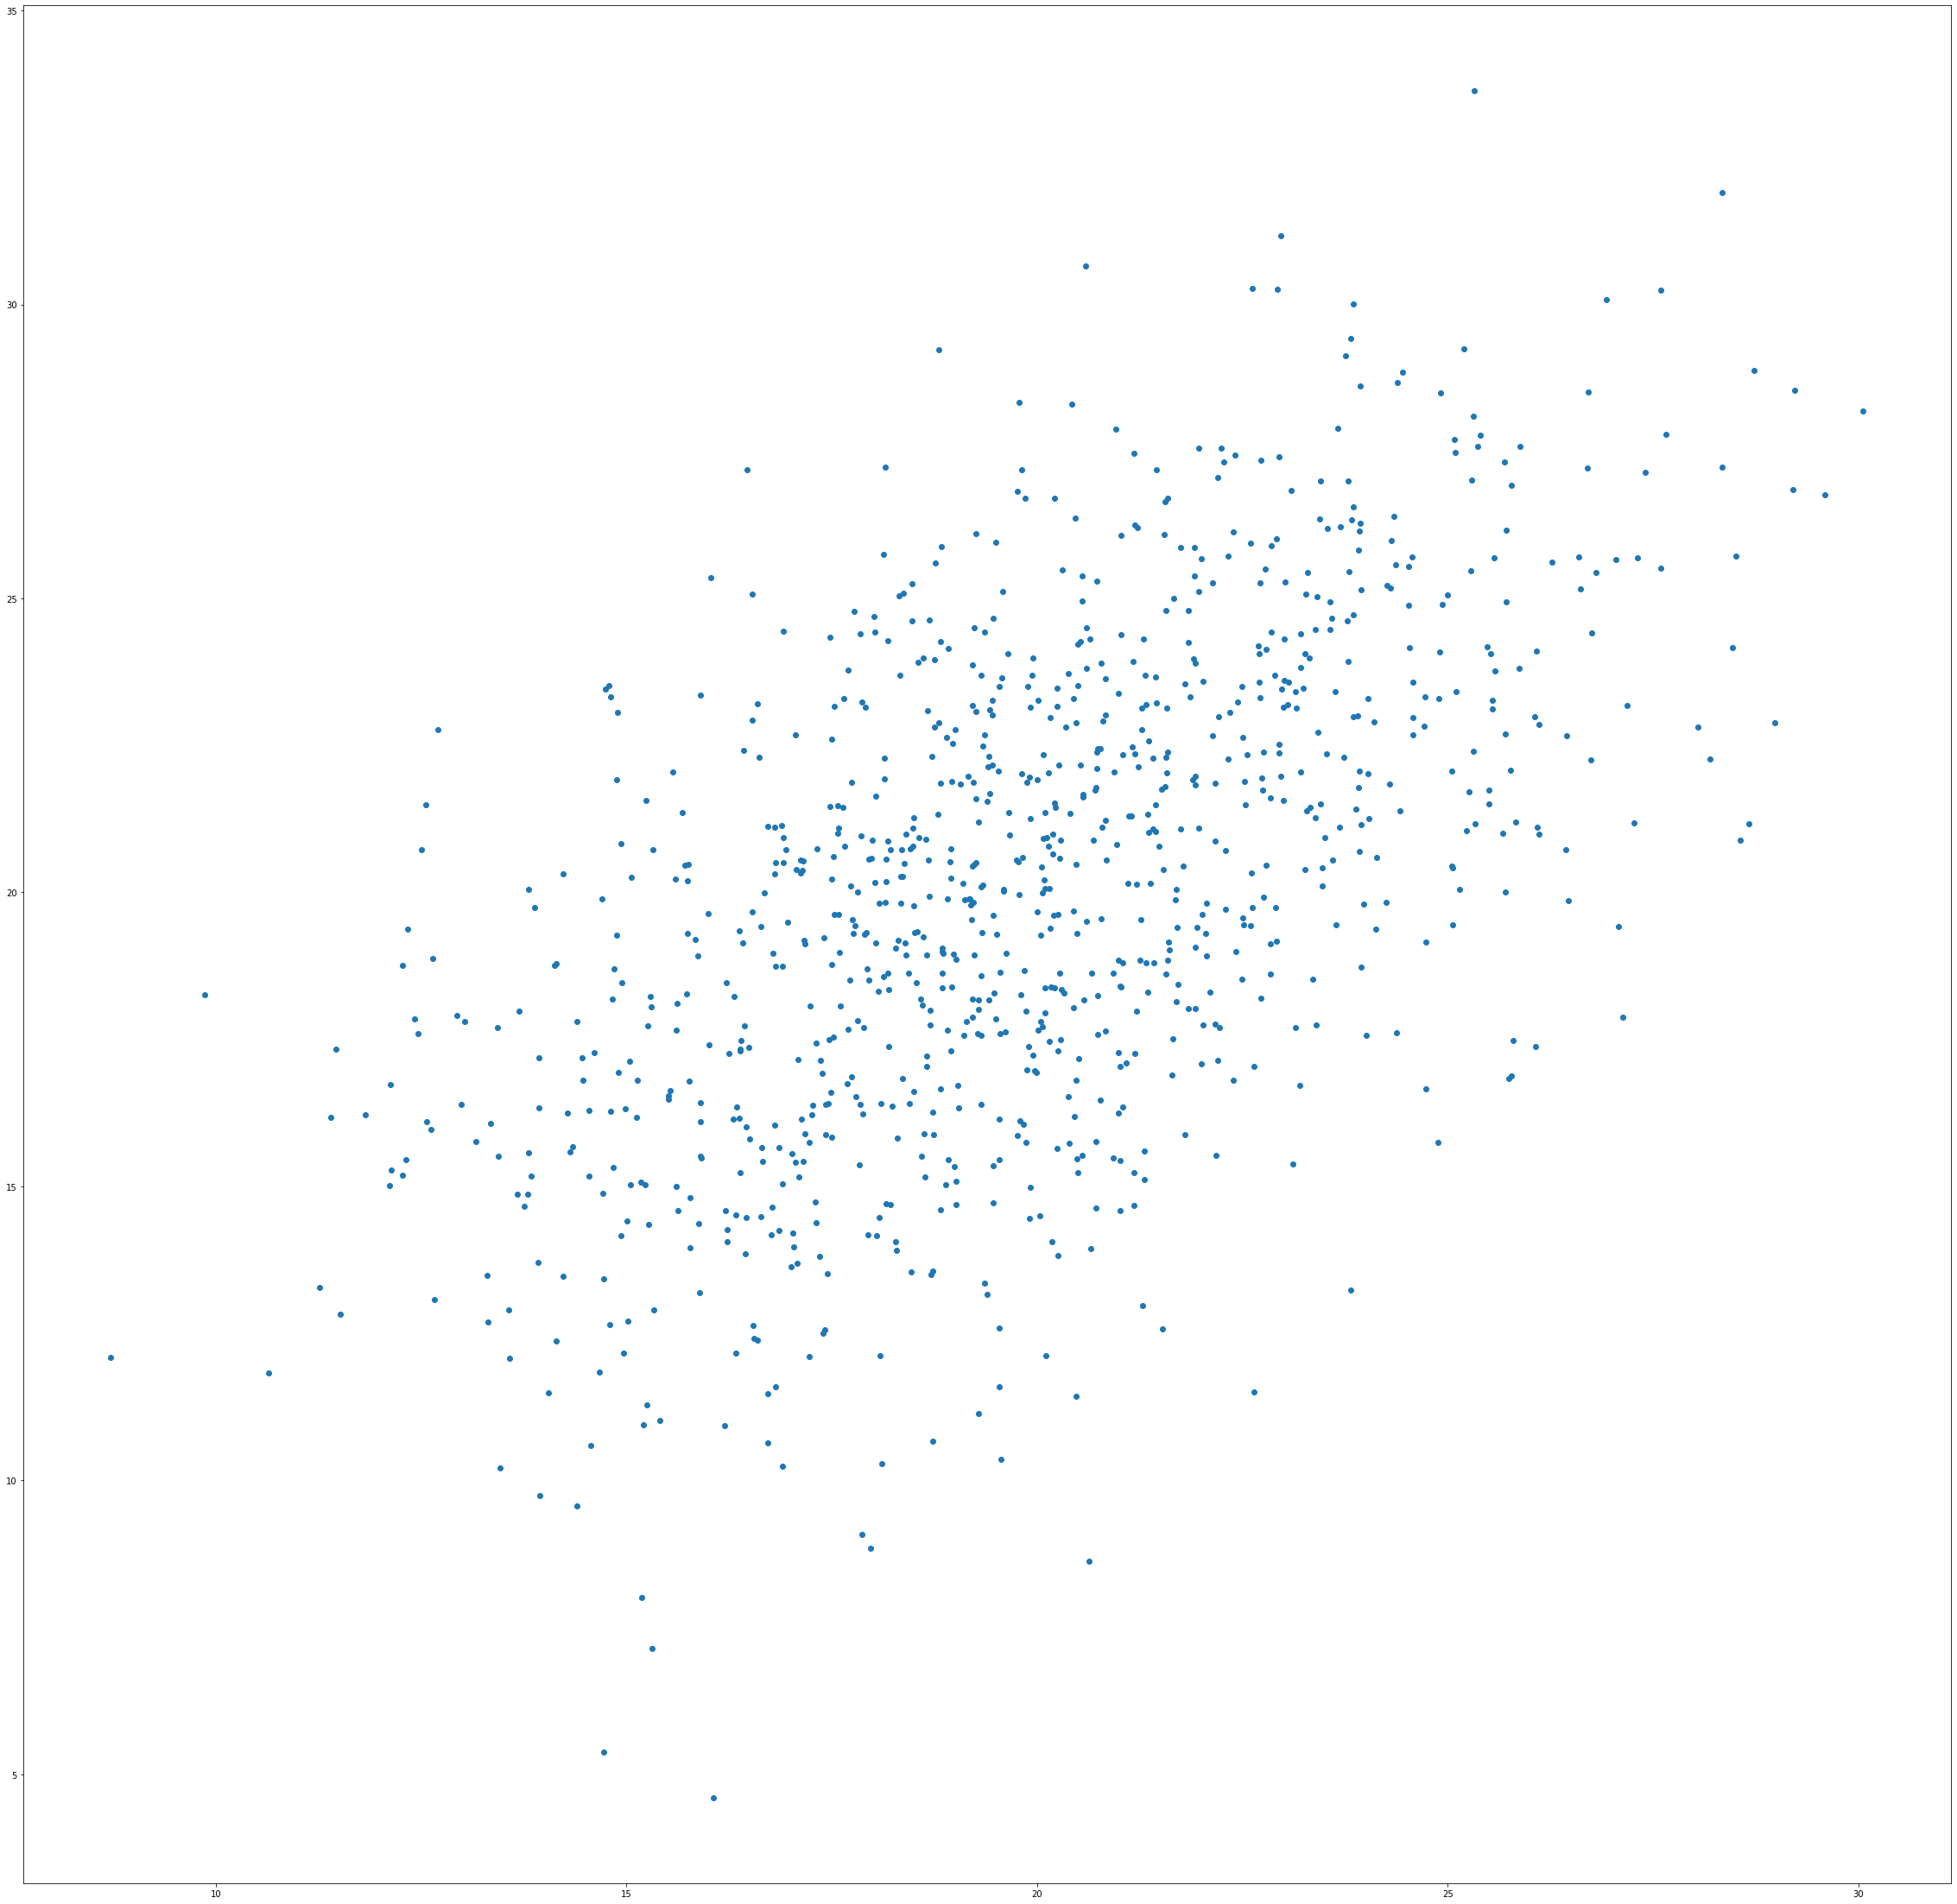

In [94]:
'''创建数据集'''
mean = [20,20]
cov = [[12,8],[8,18]]
x,y = np.random.multivariate_normal(mean,cov,1000).T
#   从多元正态分布中随机抽取样本 坐标（x,y)

plt.figure(figsize=(40,40))
plt.plot(x,y,'o',zorder = 1)
plt.show()